<a href="https://colab.research.google.com/github/AnacletoLAB/grape/blob/main/tutorials/Ensmallen_Automatic_Graph_Retieval_KGOBO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensmallen Automatic Graph Retrieval - KGOBO
In this tutorial we will explore how to use the graphs that can be automatically retrieved by [Ensmallen](https://github.com/AnacletoLAB/ensmallen) from [OboFoundry](http://www.obofoundry.org/) through [Justin Reese](https://github.com/justaddcoffee) and [Harry Caufield](https://github.com/caufieldjh)'s [KGX](https://github.com/biolink/kgx)-based pipeline, [KG-OBO](https://github.com/Knowledge-Graph-Hub/kg-obo).

The graphs available are those that can be currently converted from the OBO format to KGX format, and will be downloaded from the [kg-obo website](https://kg-hub.berkeleybop.io/kg-obo/).

## Installing GraPE
In order to install the [GraPE library](https://github.com/AnacletoLAB/grape), which includes the [Ensmallen](https://github.com/AnacletoLAB/ensmallen) (efficient graph data structure) and [Embiggen](https://github.com/monarch-initiative/embiggen) (graph machine learning) modules, run:

```bash
pip install grape
```

## Installing Ensmallen
In order to install the Ensmallen graph library exclusively (for instance if you want to avoid having dependencies to TensorFlow) just run:

```bash
pip install ensmallen
```

In [1]:
!pip install -q grape

You should consider upgrading via the '/Users/lucacappelletti/opt/miniconda3/bin/python -m pip install --upgrade pip' command.


## Which OBO graphs are available?
To get a list of all the OBO graphs currently available from Ensmallen, we can quickly get the dataframe with all of the graphs data and query it.

In [2]:
from grape.datasets import get_all_available_graphs_dataframe

In [3]:
available_graphs = get_all_available_graphs_dataframe()
available_graphs[available_graphs.repository == "kgobo"]

Parsing repositories:   0%|                              | 0/13 [00:00<?, ?it/s]

Parsing graphs:   0%|                                     | 0/3 [00:00<?, ?it/s]

Parsing graphs:   0%|                                   | 0/195 [00:00<?, ?it/s]

Parsing graphs:   0%|                                    | 0/10 [00:00<?, ?it/s]

Parsing graphs:   0%|                                 | 0/27741 [00:00<?, ?it/s]

Parsing graphs:   0%|                                     | 0/6 [00:00<?, ?it/s]

Parsing graphs:   0%|                                     | 0/2 [00:00<?, ?it/s]

Parsing graphs:   0%|                                     | 0/1 [00:00<?, ?it/s]

Parsing graphs:   0%|                                  | 0/1193 [00:00<?, ?it/s]

Parsing graphs:   0%|                                     | 0/1 [00:00<?, ?it/s]

Parsing graphs:   0%|                                     | 0/7 [00:00<?, ?it/s]

Parsing graphs:   0%|                                     | 0/1 [00:00<?, ?it/s]

Parsing graphs:   0%|                                     | 0/1 [00:00<?, ?it/s]

Parsing graphs:   0%|                                   | 0/545 [00:00<?, ?it/s]

,repository,name,version
3,kgobo,MOD,1.031.4
4,kgobo,MOD,10-03-2021-14-36
5,kgobo,FBBT,2022-04-13
6,kgobo,FBBT,2021-09-01
7,kgobo,FBBT,2021-10-14
...,...,...,...
415,kgobo,CL,2021-12-07
416,kgobo,CL,2021-12-16
417,kgobo,CL,2022-01-05
418,kgobo,MFOEM,2021-11-17


## How to load up a graph
To retrieve one of the available OBO graphs, as per any other repository, you can use:

In [4]:
from grape.datasets.kgobo import ZFS

In [5]:
graph = ZFS()

Let's get the graph report:

In [6]:
graph

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>ZFS</h2><p class="paragraph">The undirected graph ZFS has 77 homogeneous nodes and 149 heterogeneous edges. The graph contains 20 connected components (of which 15 are disconnected nodes), with the largest one containing 54 nodes and the smallest one containing a single node. The RAM requirements for the nodes and edges data structures are 9.05KB and 536B respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 0, the maximum node degree is 53, the mode degree is 4, the mean degree is 3.87 and the node degree median is 4.</p><p class="paragraph">The nodes with the highest degree centrality are <a href='http://purl.obolibrary.org/obo/ZFS_0100000' target='_blank' title='Go to Open Biomedical Ontology to get more informations about OBO:ZFS_0100000'>OBO:ZFS_0100000</a> (degree 53 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='http://purl.obolibrary.org/obo/ZFS_0000045' target='_blank' title='Go to Open Biomedical Ontology to get more informations about OBO:ZFS_0000045'>OBO:ZFS_0000045</a> (degree 12 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='http://purl.obolibrary.org/obo/ZFS_0000048' target='_blank' title='Go to Open Biomedical Ontology to get more informations about OBO:ZFS_0000048'>OBO:ZFS_0000048</a> (degree 10 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='http://purl.obolibrary.org/obo/ZFS_0000049' target='_blank' title='Go to Open Biomedical Ontology to get more informations about OBO:ZFS_0000049'>OBO:ZFS_0000049</a> (degree 9 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>) and <a href='http://purl.obolibrary.org/obo/ZFS_0000047' target='_blank' title='Go to Open Biomedical Ontology to get more informations about OBO:ZFS_0000047'>OBO:ZFS_0000047</a> (degree 9 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has a single node type, which is <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>. The RAM requirement for the node types data structure is 4.31KB.</p><h4 style="margin: 1em 0 0 0;">Homogeneous node types</h4><p class="pa

## Some example operations on the graph
Here follows some examples of operations that can be executed on the graph object.

### How to easily find a method
The library includes a user recommender system to help you find any method, for instance suppose you want to compute the diameter and do not know the method name, or maybe are distracted and mistype it:

In [7]:
graph.djametr

AttributeError: The method 'djametr' does not exists, did you mean one of the following?
* 'get_diameter'
* 'get_diameter_naive'
* 'get_laplacian_transformed_graph'
* 'get_laplacian_coo_matrix_edges_number'
* 'get_left_normalized_laplacian_transformed_graph'
* 'get_right_normalized_laplacian_transformed_graph'
* 'get_symmetric_normalized_laplacian_transformed_graph'
* 'get_symmetric_normalized_transformed_graph'
* 'is_unchecked_connected_from_node_id'
* 'is_connected_from_node_id'

Additionally, generally speaking you can alway use the `dir` method to search for a method:

In [8]:
dir(graph)

['__and__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_repr_html_',
 'add_edge_type_name_inplace',
 'add_node_type_id_from_node_name_prefixes',
 'add_node_type_id_from_node_name_prefixes_inplace',
 'add_node_type_name_from_node_name_prefixes',
 'add_node_type_name_from_node_name_prefixes_inplace',
 'add_node_type_name_inplace',
 'add_selfloops',
 'approximated_vertex_cover_set',
 'are_nodes_remappable',
 'build_bipartite_graph_from_edge_node_ids',
 'build_bipartite_graph_from_edge_node_names',
 'build_bipartite_graph_from_edge_node_prefixes',
 'build_bipartite_graph_from_edge_node_types',
 

Finally, to see a method documentation you can use:

In [9]:
help(graph.get_node_degrees)

Help on built-in function get_node_degrees:

get_node_degrees() method of builtins.Graph instance
    Returns the unweighted degree of every node in the graph



### Enabling time-memory tradeoffs
The Ensmallen library includes a few time-memory tradeoffs that allow you to choose to spend more memory and get faster execution times. While we do not currently enable these by default because we do not know what you will be doing with the graph object, in most use cases (graphs within a few million nodes) they can be enabled without cornerns.

In [10]:
graph.enable()

### Diameter of the graph
Computing the diameter of the graph using [ifub](https://who.rocq.inria.fr/Laurent.Viennot/road/papers/ifub.pdf).

Since the graph is not connected, it has infinite diameter:

In [11]:
%%time
graph.get_diameter()

CPU times: user 12 µs, sys: 7 µs, total: 19 µs
Wall time: 22.2 µs


inf

In order to get the diameter of the component with the most central node, you can use:

In [12]:
%%time
graph.get_diameter(ignore_infinity=True)

CPU times: user 1.59 ms, sys: 3.31 ms, total: 4.9 ms
Wall time: 569 µs


2.0

### Connected components
Compute the connected components of the graph:

In [13]:
%%time
(component_ids, components_number, minimum_component_size, maximum_component_size) = graph.get_connected_components()

CPU times: user 1.14 ms, sys: 2.71 ms, total: 3.85 ms
Wall time: 641 µs


### Betweenness centrality
Compute efficiently the Betweenness centrality using the algorithm described in [Parallel Algorithms for Evaluating Centrality Indices in Real-world Networks](https://ieeexplore.ieee.org/document/1690659/).

In [14]:
%%time
graph.get_betweenness_centrality()

CPU times: user 1.69 ms, sys: 787 µs, total: 2.48 ms
Wall time: 398 µs


array([1.0499999e+01, 1.1913335e+03, 3.3333334e-01, 5.3333340e+00,
       3.3333334e-01, 3.3333334e-01, 3.3333334e-01, 8.3333337e-01,
       3.3333334e-01, 3.3333334e-01, 3.3333334e-01, 8.3333337e-01,
       8.3333337e-01, 3.3333334e-01, 8.3333337e-01, 3.3333334e-01,
       3.3333334e-01, 8.3333337e-01, 8.3333337e-01, 3.3333334e-01,
       3.3333334e-01, 8.3333337e-01, 3.3333334e-01, 3.3333334e-01,
       3.3333334e-01, 3.3333334e-01, 8.3333337e-01, 2.1666667e+00,
       8.3333337e-01, 8.3333337e-01, 1.0000000e+00, 3.3333334e-01,
       8.3333337e-01, 8.3333337e-01, 1.0000000e+00, 8.3333337e-01,
       3.3333334e-01, 1.3833334e+01, 8.3333337e-01, 3.3333334e-01,
       8.3333337e-01, 3.3333334e-01, 3.3333334e-01, 1.0500000e+01,
       0.0000000e+00, 3.3333334e-01, 7.1666670e+00, 0.0000000e+00,
       3.3333334e-01, 0.0000000e+00, 3.3333334e-01, 3.3333334e-01,
       2.2000000e+01, 3.3333334e-01, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

### Visualizing the graph
To visualize the graph using dot we can get help from the Embiggen submodule (which is already installed if you have installed from GraPE):

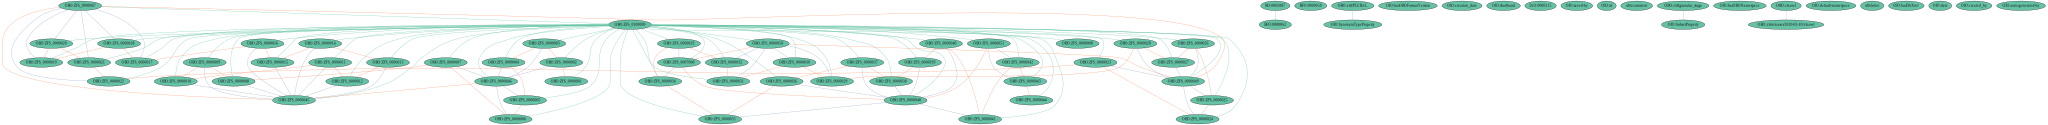

In [15]:
from grape.visualizations import GraphVisualizer

visualizer = GraphVisualizer(graph)
visualizer.plot_dot(engine="dot")

## Compute the graph node embedding

Let's use TransE:

In [16]:
from grape.embedders import TransEEnsmallen

model = TransEEnsmallen()
embedding = model.fit_transform(graph)

/Users/lucacappelletti/opt/miniconda3/lib/python3.7/site-packages/embiggen/utils/abstract_models/abstract_embedding_model.py:152: UserWarning: Please be advised that the ZFS graph contains 15 disconnected nodes. Consider that node embedding algorithms that only use topological information such as CBOW, GloVe, SPINE and SkipGram are not able to provide meaningful embeddings for these nodes, and their embedding will be generally far away from any other node. It is also possible that all disconnected nodes will receive a relatively similar node embedding. Consider dropping them by using the `graph.remove_disconnected_nodes()` method.
  f"Please be advised that the {graph.get_name()} graph "


Let's take a look at the node embedding:

In [17]:
embedding.get_node_embedding_from_index(0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
OBO:ZFS_0000047,0.013917,-0.112794,-0.028599,0.017392,0.113219,-0.226891,0.103919,-0.028737,0.058337,0.158535,...,0.064683,0.034967,-0.078805,0.138329,0.141774,0.135924,-0.142114,0.157243,-0.064370,0.077695
OBO:ZFS_0100000,-0.037869,-0.110756,0.050370,-0.130608,0.010105,-0.945979,0.062965,-0.028484,0.077710,-0.027102,...,-0.000007,0.003704,-0.000966,0.000328,-0.000981,-0.001167,0.001736,0.000609,0.000297,0.000489
OBO:ZFS_0000026,0.017965,-0.109221,0.039412,0.680229,0.017655,-0.269533,-0.150876,-0.027729,-0.431607,0.091159,...,0.028526,-0.043312,0.017406,-0.032908,-0.015282,0.004557,-0.000501,0.013959,0.016080,-0.010887
OBO:ZFS_0000050,0.047457,-0.111577,0.115735,0.204500,0.053137,-0.186549,0.119279,-0.028778,0.027120,0.070017,...,0.001689,0.103625,-0.095399,-0.071598,-0.167311,-0.082875,-0.113046,0.041238,0.189578,-0.014044
OBO:ZFS_0000040,-0.204623,-0.106823,-0.073822,-0.025089,0.009869,-0.250598,-0.000146,-0.026753,-0.406000,0.160843,...,0.005155,-0.042529,0.009401,0.051103,-0.072916,-0.043333,0.032917,-0.036797,0.008437,-0.082135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rdfs:label,-0.150535,-0.021824,-0.092765,0.154993,0.083372,-0.134944,-0.161195,0.154070,0.056759,-0.076325,...,-0.066374,0.119057,-0.160709,0.027668,0.060445,-0.131159,0.031388,0.142775,-0.019569,0.093865
OIO:hasDbXref,0.010566,0.167699,-0.056491,0.153213,-0.041131,-0.074246,-0.153665,0.076260,-0.043266,0.155955,...,0.111618,0.104032,0.069027,0.041140,-0.005280,-0.086634,0.074287,0.044063,0.117608,-0.153565
OIO:date,-0.010173,-0.056790,-0.055467,0.143772,-0.084533,0.130893,-0.112673,0.033396,0.147758,0.124264,...,-0.047151,-0.053484,0.017298,0.018774,0.085904,-0.085679,0.082158,0.005414,-0.018817,0.127357
OIO:created_by,0.027810,0.022311,-0.118765,0.002606,-0.067206,-0.064418,0.132179,0.115623,-0.006392,0.167737,...,-0.095906,-0.008201,-0.107439,0.042778,0.088331,0.155702,-0.021820,0.175821,0.049115,0.067521


And finally the edge types embedding:

In [18]:
embedding.get_edge_type_embedding_from_index(0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
biolink:subclass_of,0.106609,-71.816513,-0.235657,0.956025,-0.106480,18.712749,-0.491877,-162.484146,-0.550461,0.312603,...,-0.174408,-0.131670,0.169759,0.104009,0.055161,0.137178,0.114062,-0.148216,0.086007,-0.002455
biolink:preceded_by,0.060942,-0.074675,-0.083890,0.088877,0.059256,-0.132540,0.045239,-0.156075,0.115183,0.138405,...,0.178405,-0.002322,-0.080113,0.058796,0.133372,-0.119859,0.108508,0.126908,0.063957,-0.100374
biolink:part_of,-0.123298,-0.059564,-0.165346,0.155314,-0.177601,0.039361,0.021780,0.055233,0.107314,-0.150013,...,-0.019395,0.049018,0.077148,0.142941,0.079187,-0.045840,0.038990,-0.045193,-0.145847,0.101194
owl:versionIRI,-0.049525,0.031603,0.036138,0.067544,-0.065010,-0.060560,-0.157441,0.008394,0.148497,0.117586,...,0.065479,0.181652,-0.168773,0.020021,0.054680,-0.006663,-0.230625,-0.020154,0.160017,0.109680


### Visualizing the computed node embedding
We can use the visualizer, transforming the node embedding using a TSNE, to get a visualization of its node degrees and edge types:

/Users/lucacappelletti/opt/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1854: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/Users/lucacappelletti/opt/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1854: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/Users/lucacappelletti/opt/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1854: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/Users/lucacappelletti/opt/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1854: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/Users/lucacappelletti/opt/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1854: UserWarning: y_pred contains clas

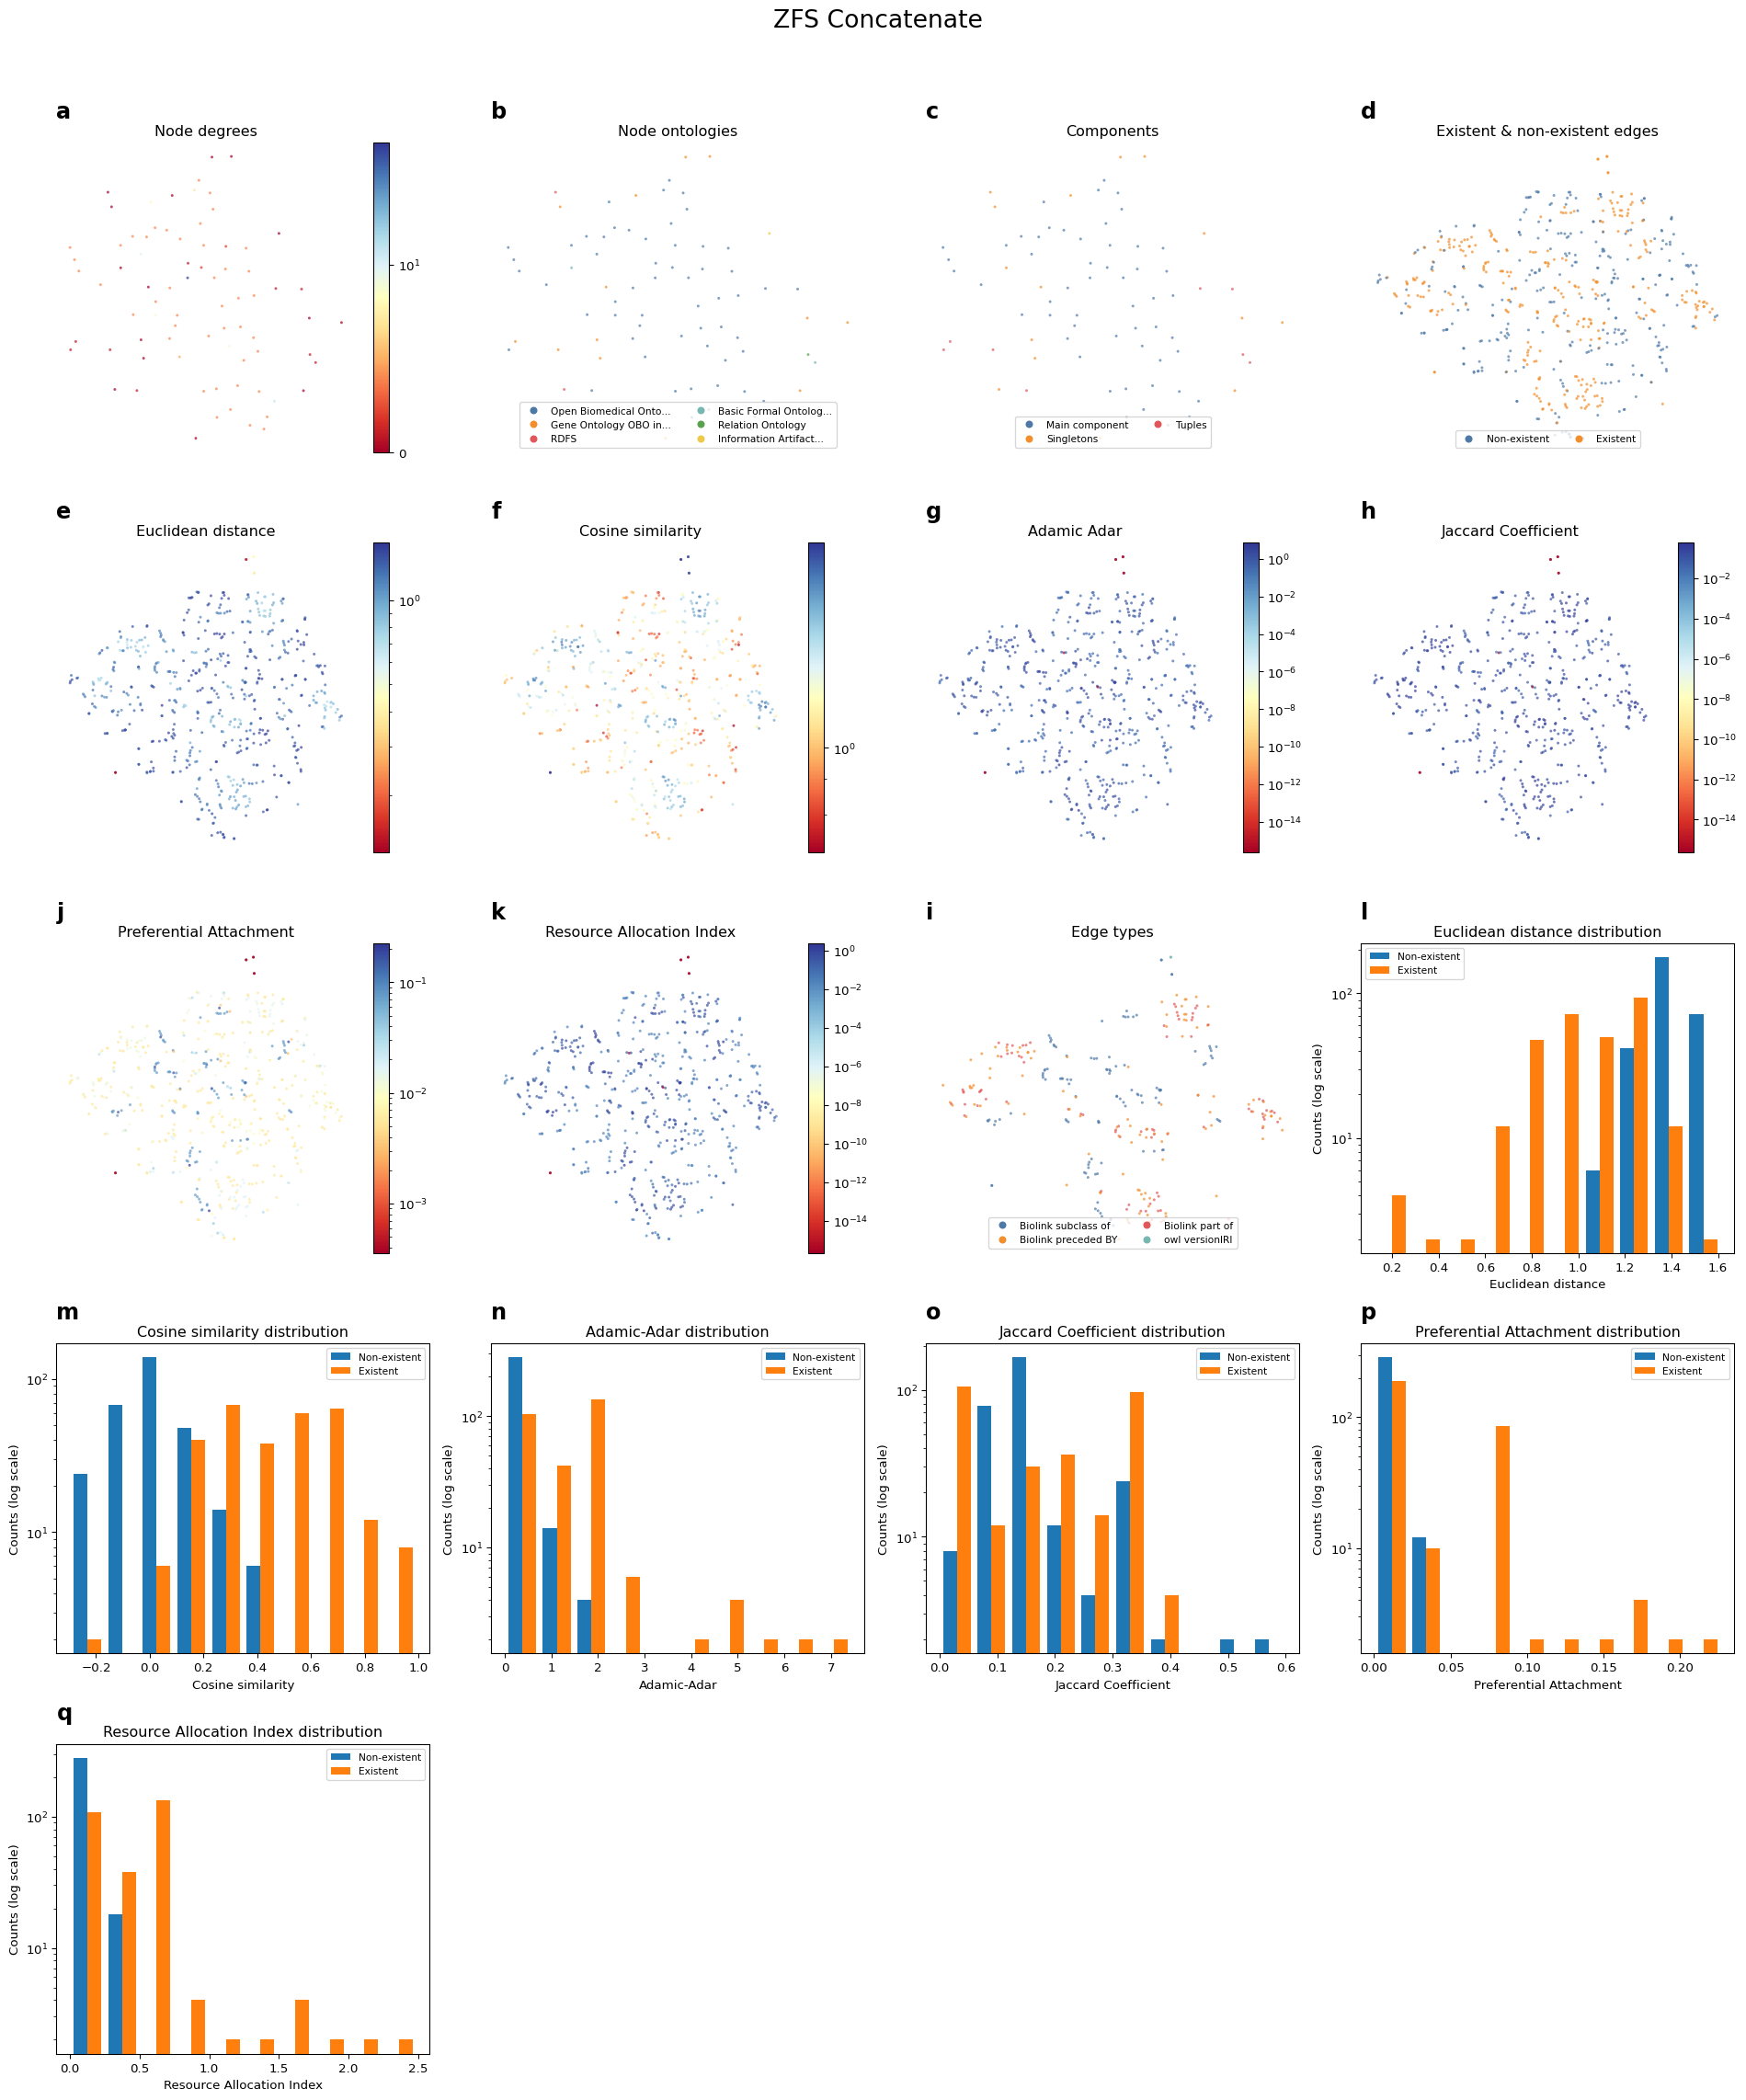

In [19]:
from grape import GraphVisualizer

visualizer = GraphVisualizer(graph)
visualizer.fit_and_plot_all(embedding.get_node_embedding_from_index(0))

*Would you like this tutorial to include some more sections? Please do let us know [by opening a issue in the GraPE repository](https://github.com/AnacletoLAB/grape/issues/new).*